## PARTE 1 - ¿De qué manera se ha visto afectado el consumo y los precios de F&H durante la pandemia con respecto a años anteriores?

### CARGAR DATASETS (CONSUMO, PRECIOS ANDALUCÍA, PRECIOS MERCAMADRID, PRECIOS MERCABARNA)

In [1]:
import pandas as pd
import numpy as np

df_consumo = pd.read_csv("C:/Users/jimen/Cajamar2021/datasets/consumoF&H_Limpio.csv")
df_preciosAnd = pd.read_csv("C:/Users/jimen/Cajamar2021/datasets/preciosAndalucia_Limpio.csv")
df_mercaMadrid = pd.read_csv("C:/Users/jimen/Cajamar2021/datasets/mercaMadrid_Limpio.csv")
df_mercaBarna = pd.read_csv("C:/Users/jimen/Cajamar2021/datasets/mercaBarna_Limpio.csv")

### CÁLCULO VARIACIONES 2020 RESPECTO 2019 (%)

In [2]:
# Partir los datasets por año
df_consumo_2020 = df_consumo[(df_consumo['Año'] == 2020)]
df_consumo_2018 = df_consumo[(df_consumo['Año'] == 2018)]
df_consumo_2019 = df_consumo[(df_consumo['Año'] == 2019)]

In [3]:
# Hacer una unión de los datasets de 2018,2019 y 2020 por el campo producto,CCAA,Mes para poder estudiar la variación(%)
df_2019 = df_consumo_2019.merge(df_consumo_2018, left_on=['Producto','CCAA','Mes'], right_on=['Producto','CCAA','Mes'], how='inner')
df_2020 = df_consumo_2020.merge(df_2019, left_on=['Producto','CCAA','Mes'], right_on=['Producto','CCAA','Mes'], how='inner')

In [4]:
# Calcular la variación consumo de 2020 respecto a 2019 (%) y 2019 respecto a 2018(%)
df_2020['Variación consumo 2020 respecto a 2019 (%)'] = ((df_2020['Volumen (miles de kg)'].values - df_2020['Volumen (miles de kg)_x'].values)/df_2020['Volumen (miles de kg)_x'].values)*100
df_2020['Variación consumo 2019 respecto a 2018 (%)'] = ((df_2020['Volumen (miles de kg)_x'].values - df_2020['Volumen (miles de kg)_y'].values)/df_2020['Volumen (miles de kg)_y'].values)*100

In [5]:
# Realizar el mismo paso pero con la variación del precio
df_2020['Variación precio 2020 respecto a 2019 (%)'] = ((df_2020['Valor (miles de €)'].values - df_2020['Valor (miles de €)_x'].values)/df_2020['Valor (miles de €)_x'].values)*100
df_2020['Variación precio 2019 respecto a 2018 (%)'] = ((df_2020['Valor (miles de €)_x'].values - df_2020['Valor (miles de €)_y'].values)/df_2020['Valor (miles de €)_y'].values)*100
df_2020 = df_2020[['Fecha','Año','Mes','CCAA','Producto','Volumen (miles de kg)','Valor (miles de €)','Precio medio kg','Penetración (%)','Consumo per capita','Variación consumo 2020 respecto a 2019 (%)','Variación consumo 2019 respecto a 2018 (%)','Variación precio 2020 respecto a 2019 (%)','Variación precio 2019 respecto a 2018 (%)']]

In [6]:
# Poner fecha como índice
df_2020.set_index('Fecha',inplace=True)

In [7]:
# Guardar dataframe en csv
df_2020.to_csv("Comparación_precioyconsumo.csv", encoding = 'utf-8-sig')

In [8]:
df_2020.reset_index()

,Fecha,Año,Mes,CCAA,Producto,Volumen (miles de kg),Valor (miles de €),Precio medio kg,Penetración (%),Consumo per capita,Variación consumo 2020 respecto a 2019 (%),Variación consumo 2019 respecto a 2018 (%),Variación precio 2020 respecto a 2019 (%),Variación precio 2019 respecto a 2018 (%)
0,03-2020,2020,3,Total Nacional,TOTAL PATATAS,144056.38,137944.62,0.96,84.67,3.25,35.581965,-5.115476,38.886339,7.512069
1,03-2020,2020,3,Total Nacional,PATATAS FRESCAS,104636.60,94686.83,0.90,75.78,2.36,36.292104,-3.185332,42.649630,18.293599
2,03-2020,2020,3,Total Nacional,PATATAS CONGELADAS,4758.65,6222.38,1.31,12.17,0.11,28.738813,-13.449191,33.040983,-13.171237
3,03-2020,2020,3,Total Nacional,PATATAS PROCESADAS,6932.23,37035.41,5.34,51.81,0.16,34.448463,-9.250514,31.016662,-8.469507
4,03-2020,2020,3,Total Nacional,T.HORTALIZAS FRESCAS,257552.90,498665.95,1.94,97.66,5.81,12.664187,3.022546,16.898607,6.260482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,11-2020,2020,11,Total Nacional,UVAS,15918.49,42755.62,2.69,0.00,0.36,15.725388,5.882688,26.655398,4.574911
3293,11-2020,2020,11,Total Nacional,KIWI,12253.15,41949.06,3.42,0.00,0.28,0.019182,-8.606129,5.392498,1.256797
3294,11-2020,2020,11,Total Nacional,PATATAS FRESCAS,89679.98,76899.34,0.86,0.00,2.02,14.639263,4.306546,10.615640,13.862612
3295,11-2020,2020,11,Total Nacional,T.HORTALIZAS FRESCAS,238554.47,472592.86,1.98,0.00,5.38,12.314664,7.263373,15.059069,8.318882


### ANÁLISIS DATOS SIGNIFICATIVOS DURANTE EL ESTADO DE ALARMA

El análisis que se realiza a continuación es para los 3 meses que duró el estado de alarma (marzo,abril y mayo). Para ver la evolución de las diferentes variables con la desescalada, visita nuestra página web donde están todos los informes de powerBI.

In [9]:
mes = [3,4,5]
mask = df_2020[df_2020['Mes'].isin(mes)] 

### TOP 10 PRODUCTOS CON MAYOR INCREMENTO EN EL CONSUMO (PARA EL TOTAL NACIONAL)

In [10]:
top10_productos = mask[mask['CCAA'] == 'Total Nacional']
top10_productos_consumo = pd.DataFrame(top10_productos.groupby(['Fecha','CCAA','Producto'])['Variación consumo 2020 respecto a 2019 (%)'].agg('max').sort_values(ascending = False).head(10))
pd.DataFrame(round(top10_productos_consumo['Variación consumo 2020 respecto a 2019 (%)'],2))

Variación consumo 2020 respecto a 2019 (%)
Fecha   CCAA           Producto                                                
04-2020 Total Nacional MELOCOTONES                                       371.62
                       ALBARICOQUES                                      196.83
                       NECTARINAS                                        165.75
03-2020 Total Nacional MELOCOTONES                                       120.73
04-2020 Total Nacional COLES                                             101.35
                       MELON                                              79.02
                       LIMONES                                            76.52
                       BERENJENAS                                         69.18
                       ZANAHORIAS                                         60.42
                       CALABACINES                                        51.99

Se puede observar claramente que durante los 3 meses destaca el consumo de melocotones (tuvo una pronunciada subida en marzo y abril) y el de coles (en abril). También aparecen los cítricos y hortalizas como las Zanahorias y Calabacines. 

### TOP 10 PRODUCTOS CON MAYOR CAÍDA EN EL CONSUMO (PARA EL TOTAL NACIONAL)

In [11]:
menor_productos_consumo = pd.DataFrame(top10_productos.groupby(['CCAA','Fecha','Producto'])['Variación consumo 2020 respecto a 2019 (%)'].agg('max').sort_values(ascending = True).head(10))
pd.DataFrame(round(menor_productos_consumo['Variación consumo 2020 respecto a 2019 (%)'],2))

Variación consumo 2020 respecto a 2019 (%)
CCAA           Fecha   Producto                                                 
Total Nacional 05-2020 MANDARINAS                                         -42.38
                       CHIRIMOYA                                          -38.68
               04-2020 CEREZAS                                            -22.42
               03-2020 SANDIA                                             -21.95
               04-2020 ESPARRAGOS                                         -16.77
               03-2020 FRESAS/FRESON                                      -14.73
                       ESPARRAGOS                                         -14.18
                       ALCACHOFAS                                         -11.88
                       NECTARINAS                                         -11.10
               05-2020 CEREZAS                                            -10.28

Resulta curioso el dato de la nectarina que a pesar de su caída del 11% en marzo, en abril se diparó un 165%. Frutas como las fresas o la sandía tuvieron una caída en la demanda.

### TOP 10 PRODUCTOS CON MAYOR INCREMENTO DE PRECIO (TOTAL NACIONAL)

In [12]:
top10_productos_precio = pd.DataFrame(top10_productos.groupby(['CCAA','Fecha','Producto'])['Variación precio 2020 respecto a 2019 (%)'].agg('max').sort_values(ascending = False).head(10))
pd.DataFrame(round(top10_productos_precio['Variación precio 2020 respecto a 2019 (%)'],2))

Variación precio 2020 respecto a 2019 (%)
CCAA           Fecha   Producto                                               
Total Nacional 03-2020 MELOCOTONES                                      289.37
               04-2020 ALBARICOQUES                                     264.91
                       MELOCOTONES                                      241.53
                       NECTARINAS                                       147.09
                       LIMONES                                          137.51
                       BERENJENAS                                       124.99
                       CALABACINES                                      101.69
                       COLES                                             96.97
               05-2020 LIMONES                                           87.35
                       MELOCOTONES                                       87.22

Se observa la clara relación entre el aumento del consumo y del precio,estando en el Top 10 los mismos productos -> Melocotones, Albaricoques, Nectarinas, Coles, Limones ...

### TOP 10 PRODUCTOS CON MAYOR INCREMENTO DEL CONSUMO POR CCAA

Si obtenemos los resultados del top 10 de variación de consumo por CCAA y producto se obtienen unos resultados interesantes.

In [13]:
top10_ccaa_consumo = pd.DataFrame(df_2020.groupby(['CCAA','Fecha','Producto'])['Variación consumo 2020 respecto a 2019 (%)'].agg('max').sort_values(ascending = False).head(10))
pd.DataFrame(round(top10_ccaa_consumo['Variación consumo 2020 respecto a 2019 (%)'],2))

Variación consumo 2020 respecto a 2019 (%)
CCAA          Fecha   Producto                                            
Navarra       04-2020 COLES                                        2167.78
La Rioja      05-2020 UVAS                                         1878.95
Navarra       06-2020 BROCOLI                                      1714.20
La Rioja      06-2020 CIRUELAS                                     1322.72
Castilla Leon 03-2020 CEREZAS                                      1108.62
              04-2020 POMELO                                       1101.12
Navarra       06-2020 COLES                                         945.65
              03-2020 CIRUELAS                                      867.27
              04-2020 BROCOLI                                       849.09
Cantabria     06-2020 COLES                                         800.23

En los resultados se puede apreciar que hay 3 productos que reciben el puesto de mayor variación de consumo (en diferentes CCAA).Estas son las coles, el brócoli y las ciruelas (las 3 consumidas en Navarra).

### TOP 10 PRODUCTOS CON MAYOR INCREMENTO DE PRECIO POR CCAA

In [14]:
top10_ccaa_precio = pd.DataFrame(df_2020.groupby(['CCAA','Fecha','Producto'])['Variación precio 2020 respecto a 2019 (%)'].agg('max').sort_values(ascending = False).head(10))
pd.DataFrame(round(top10_ccaa_precio['Variación precio 2020 respecto a 2019 (%)'],2))

Variación precio 2020 respecto a 2019 (%)
CCAA          Fecha   Producto                                               
Castilla Leon 04-2020 POMELO                                          2461.83
Madrid        03-2020 MELOCOTONES                                     1999.62
Cantabria     04-2020 POMELO                                          1524.42
La Rioja      05-2020 UVAS                                            1398.65
              06-2020 CIRUELAS                                        1377.18
Baleares      04-2020 NECTARINAS                                      1165.08
Extremadura   04-2020 ALBARICOQUES                                    1159.90
Navarra       04-2020 COLES                                           1066.29
                      UVAS                                            1022.55
              03-2020 CIRUELAS                                         964.53

Como se puede observar por ejemplo en el pomelo el crecimiento del precio va de la mano del del consumo (donde el consumo creció un 1101% y el precio un 2461% en Castilla León). Igual ocurre con las coles o las ciruelas en Navarra.

### REESTRUCTURACIÓN DATASETS PRECIOS ANDALUCÍA, MERCAMADRID Y MERCABARNA

In [15]:
df_preciosAnd

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,PRECIO,UNIDAD
0,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,LIMON,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,92",Euros/kg
1,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,MANDARINA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,84",Euros/kg
2,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,NARANJA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,78",Euros/kg
3,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,POMELO,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"1,01",Euros/kg
4,1/1/2018,7/1/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"3,77",Euros/kg
...,...,...,...,...,...,...,...,...,...,...,...
19402,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),RAMA (ECO),SIN ESPECIFICAR (ECO),Agricultor,"0,65",Euros/kg
19403,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),REDONDO (ECO),SIN ESPECIFICAR (ECO),Agricultor,"0,42",Euros/kg
19404,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),PERA SUELTO ROJO (ECO),Agricultor,1,Euros/kg
19405,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),REDONDO RAMA ROJO (ECO),Agricultor,"1,24",Euros/kg


In [16]:
df_mercaMadrid.set_index('DATE') 

,product,origen,Unidad,familia,price_mean,price_min,price_max,Volumen,Valor (en euros)
DATE,,,,,,,,,
2018-02-01,ACEITUNAS,ALMERIA,kg,FRUTAS,3.46,3.31,3.61,6700.0,23182.0
2018-04-01,ACEITUNAS,ALMERIA,kg,FRUTAS,3.46,3.31,3.61,400.0,1384.0
2018-05-01,ACEITUNAS,ALMERIA,kg,FRUTAS,3.46,3.31,3.61,260.0,899.6
2018-04-01,ACEITUNAS,BADAJOZ,kg,FRUTAS,3.46,3.31,3.61,24060.0,83247.6
2018-02-01,ACEITUNAS,CACERES,kg,FRUTAS,3.46,3.31,3.61,700.0,2422.0
...,...,...,...,...,...,...,...,...,...
2020-06-01,YAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,1.50,1.38,1.80,5220.0,7830.0
2020-08-01,YAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,1.50,1.38,1.80,2340.0,3510.0
2020-09-01,YAME,OTROS PAIS.AFRICANOS,kg,HORTALIZAS,1.50,1.38,1.80,4340.0,6510.0


In [17]:
df_preciosAnd

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,PRECIO,UNIDAD
0,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,LIMON,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,92",Euros/kg
1,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,MANDARINA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,84",Euros/kg
2,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,NARANJA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"0,78",Euros/kg
3,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,POMELO,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"1,01",Euros/kg
4,1/1/2018,7/1/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,"3,77",Euros/kg
...,...,...,...,...,...,...,...,...,...,...,...
19402,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),RAMA (ECO),SIN ESPECIFICAR (ECO),Agricultor,"0,65",Euros/kg
19403,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),REDONDO (ECO),SIN ESPECIFICAR (ECO),Agricultor,"0,42",Euros/kg
19404,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),PERA SUELTO ROJO (ECO),Agricultor,1,Euros/kg
19405,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),REDONDO RAMA ROJO (ECO),Agricultor,"1,24",Euros/kg


In [18]:
df_preciosAnd['PRECIO'] = df_preciosAnd.PRECIO.str.replace(',','.')
df_preciosAnd['PRECIO'] = df_preciosAnd['PRECIO'].astype(float)

In [19]:
df_preciosAnd

,INICIO,FIN,GRUPO,SECTOR,SUBSECTOR,PRODUCTO,TIPO,SUBTIPO,POSICION,PRECIO,UNIDAD
0,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,LIMON,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,0.92,Euros/kg
1,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,MANDARINA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,0.84,Euros/kg
2,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,NARANJA,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,0.78,Euros/kg
3,1/1/2018,7/1/2018,Agrícola,Frutales,Citricos,POMELO,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,1.01,Euros/kg
4,1/1/2018,7/1/2018,Agrícola,Frutales,Frutales no cítricos,AGUACATE,SIN ESPECIFICAR,SIN ESPECIFICAR,Mercas,3.77,Euros/kg
...,...,...,...,...,...,...,...,...,...,...,...
19402,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),RAMA (ECO),SIN ESPECIFICAR (ECO),Agricultor,0.65,Euros/kg
19403,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),REDONDO (ECO),SIN ESPECIFICAR (ECO),Agricultor,0.42,Euros/kg
19404,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),PERA SUELTO ROJO (ECO),Agricultor,1.00,Euros/kg
19405,11/23/2020,11/29/2020,Agricultura ecológica,Hortalizas ecológicas,Hortícolas protegidos ecológicos,TOMATE (ECO),TIPO CHERRY (ECO),REDONDO RAMA ROJO (ECO),Agricultor,1.24,Euros/kg


In [20]:
# Se crea la columna Fecha con el mes de la columna inicio
df_preciosAnd['Fecha'] = pd.to_datetime(df_preciosAnd['INICIO']).dt.to_period("M")

In [21]:
# Se agrupan los datos por Fecha, producto, grupo y sector y se calcula el precio medio
df_preciosAnd_medio = df_preciosAnd.groupby(['Fecha','PRODUCTO','GRUPO','SECTOR'])['PRECIO'].mean().reset_index()
df_preciosAnd_medio['PROCEDENCIA'] = 'Andalucía'
df_preciosAnd_medio

,Fecha,PRODUCTO,GRUPO,SECTOR,PRECIO,PROCEDENCIA
0,2018-01,AGUACATE,Agrícola,Frutales,1.610727,Andalucía
1,2018-01,AJO,Agrícola,Hortalizas,1.810000,Andalucía
2,2018-01,ALMENDRA,Agrícola,Frutales,4.916000,Andalucía
3,2018-01,ARANDANO,Agrícola,Hortalizas,8.430000,Andalucía
4,2018-01,BERENJENA,Agrícola,Hortalizas,0.637442,Andalucía
...,...,...,...,...,...,...
1099,2020-12,POMELO,Agrícola,Frutales,1.320000,Andalucía
1100,2020-12,SANDIA,Agrícola,Hortalizas,0.860000,Andalucía
1101,2020-12,TOMATE,Agrícola,Hortalizas,1.240769,Andalucía
1102,2020-12,TOMATE (ECO),Agricultura ecológica,Hortalizas ecológicas,1.356667,Andalucía


In [22]:
# Se realiza el mismo poceso con el dataset de mercaMadrid
df_mercaMadrid['Fecha'] = pd.to_datetime(df_mercaMadrid['DATE']).dt.to_period("M")
df_mercaMadrid_medio = df_mercaMadrid.groupby(['Fecha','product','familia'])['price_mean'].mean().reset_index()
df_mercaMadrid_medio['PROCEDENCIA'] = 'MercaMadrid'
df_mercaMadrid_medio

,Fecha,product,familia,price_mean,PROCEDENCIA
0,2018-01,ACEITUNAS,FRUTAS,3.460000,MercaMadrid
1,2018-01,ACELGAS,HORTALIZAS,0.772175,MercaMadrid
2,2018-01,AGUACATES,FRUTAS,4.000000,MercaMadrid
3,2018-01,AJOS,HORTALIZAS,1.753511,MercaMadrid
4,2018-01,ALBARICOQUES,FRUTAS,2.000000,MercaMadrid
...,...,...,...,...,...
2993,2020-11,TOMATES,HORTALIZAS,1.492691,MercaMadrid
2994,2020-11,UVAS,FRUTAS,1.702366,MercaMadrid
2995,2020-11,YAME,HORTALIZAS,1.500000,MercaMadrid
2996,2020-11,YUCA,HORTALIZAS,1.000000,MercaMadrid


In [23]:
# Se realiza el mismo proceso con el dataset de mercaBarna
df_mercaBarna['Fecha'] = pd.to_datetime(df_mercaBarna['DATE']).dt.to_period("M")
df_mercaBarna_medio = df_mercaBarna.groupby(['Fecha','product','familia'])['price_mean'].mean().reset_index()
df_mercaBarna_medio['PROCEDENCIA'] = 'MercaBarna'
df_mercaBarna_medio

,Fecha,product,familia,price_mean,PROCEDENCIA
0,2018-01,ACEITUNAS,FRUTAS HUESO,3.800000,MercaBarna
1,2018-01,ACELGAS,HORTALIZAS HOJA,0.760212,MercaBarna
2,2018-01,AGUACATE,FRUTAS EXOTICAS,3.230595,MercaBarna
3,2018-01,AJOS SECOS,HORTALIZAS BULBOS,1.751909,MercaBarna
4,2018-01,AJOS TIERNOS,HORTALIZAS BULBOS,0.724286,MercaBarna
...,...,...,...,...,...
4323,2020-11,TOMATE MADURO,HORTALIZAS FRUTO,0.795429,MercaBarna
4324,2020-11,TOMATE VERDE,HORTALIZAS FRUTO,1.064864,MercaBarna
4325,2020-11,VARIOS,OTROS OTROS,1.500000,MercaBarna
4326,2020-11,VERDURAS OTRAS,HORTALIZAS OTROS,0.700000,MercaBarna


In [24]:
# Pasar a csv los datasets con los precios medios de cada producto por mesy año
# df_mercaBarna_medio.to_csv("Precios_medios_mercaBarna.csv", encoding='utf-8-sig')
# df_mercaMadrid_medio.to_csv("Precios_medios_mercaMadrid.csv",encoding = 'utf-8-sig')
# df_preciosAnd_medio.to_csv("Precios_medios_Andalucia.csv", encoding = 'utf-8-sig')

[Text(0.5, 1.0, 'Mapa de correlación de las diferentes variables')]

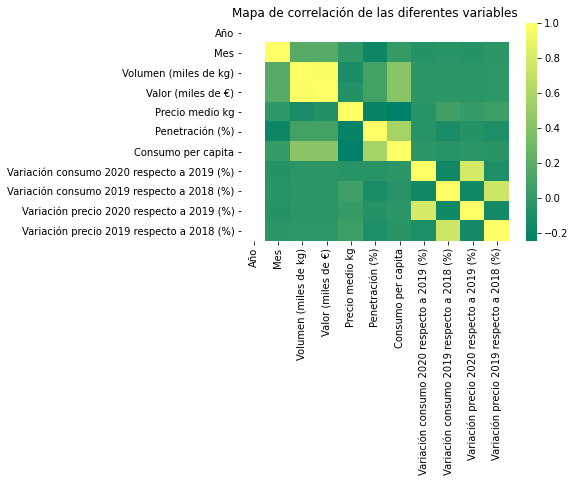

In [25]:
# Estudio de correlación de las diferentes variables
import seaborn as sns
sns.heatmap(df_2020.corr(), cmap='summer').set(title="Mapa de correlación de las diferentes variables")

Se puede observar que existe una correlación alta entre la variación(%) del consumo y la variación(%) del precio, sin embargo el resto de variables tienen una correlación muy baja, excepto aquellas que están directamente relacionadas a través de otras. Este es el caso del volumen(kg) y el valor(miles de €) que se relacionan a través de la variable precio medio. 

### REPRESENTACIONES

In [26]:
from IPython.display import IFrame
IFrame("https://app.powerbi.com/view?r=eyJrIjoiMjc0ODAzMjgtOWEwNS00MjVkLWIzZTUtNTUwNjc1Mjc1YjAxIiwidCI6IjZhZmVhODVkLWMzMjMtNDI3MC1iNjlkLWE0ZmIzOTI3YzI1NCIsImMiOjl9",height=550,width=1000)

*En el informe se representa la variación del consumo y del precio en % de 2020 con respecto a 2019 y de 2019 con respecto a 2018 por producto y CCAA.*

Para el análisis más detallado, acudir a: https://datacrop.es/reto-analisis-1/

### CONCLUSIONES EN LÍNEAS GENERALES (más en detalle en la web de Datacrop)

- La población cambia sus hábitos de consumo hacia una dieta más saludable (como consecuencia de la falta de movilidad por el estado de alarma).
- Gran aumento del consumo en abril, que llevó a una bajada con la desescalada y a una estabilización con la "nueva normalidad"
- Interés de la población por:
    - Frutas con hueso (melocotón,ciruela,albaricoque,nectarina)
    - Cítricos: limones
    - Uva
    - Frutas ricas en Vitamina C (naranjas)
    - Hortalizas como (coles, brócoli o lechuga)
    
- Caída del consumo de frutas durante la temporada (fresas)
- El precio subió en la misma medida que el consumo